# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Prerequisites

Before starting this project, you should have some basic knowledge of Python programming and Pandas. In addition, you may want to use the following packages in your Python environment:

- pandas
- numpy
- seaborn
- matplotlib

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Task 1: Load the Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load the dataset

file_path= 'Online Retail.xlsx'
data = pd.read_excel(file_path)

In [4]:
# Display the first few rows of the dataset
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [9]:
# Display basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [10]:
# Show summary statistics
data.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909.0,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900.0,4070,4223,NaN,23260,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom
freq,1114.0,2313,2369,NaN,1114,NaN,NaN,495478
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN


In [11]:
# Check for missing values
data.isnull().sum()

# Drop rows with missing CustomerID (if needed)
data = data.dropna(subset=['CustomerID'])

# Remove any duplicate rows
data = data.drop_duplicates()

# Check for any further issues
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [12]:
# Summary statistics for numerical columns
print(data[['Quantity', 'UnitPrice']].describe())


            Quantity      UnitPrice
count  401604.000000  401604.000000
mean       12.183273       3.474064
std       250.283037      69.764035
min    -80995.000000       0.000000
25%         2.000000       1.250000
50%         5.000000       1.950000
75%        12.000000       3.750000
max     80995.000000   38970.000000


In [13]:
# Frequency count of categorical columns
print(data['Country'].value_counts())
print(data['Description'].value_counts().head(10))  # Top 10 products

United Kingdom          356728
Germany                   9480
France                    8475
EIRE                      7475
Spain                     2528
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1471
Australia                 1258
Norway                    1086
Italy                      803
Channel Islands            757
Finland                    695
Cyprus                     611
Sweden                     461
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     247
Unspecified                241
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

Text(0, 0.5, 'Total quantity sold')

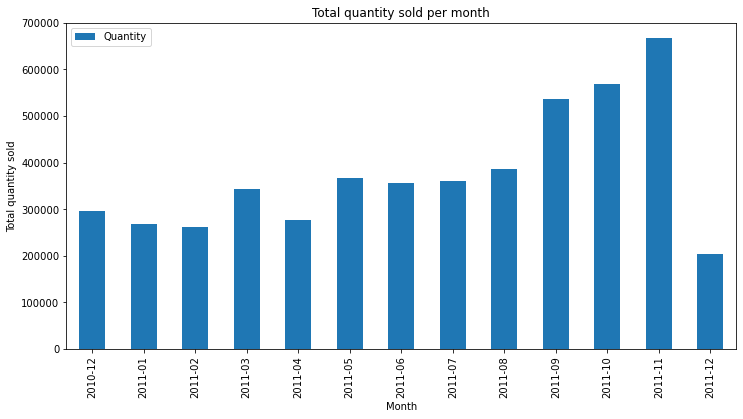

In [14]:
# Convert InvoiceDate to datetime format
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Extract month and day of the week
data['Month'] = data['InvoiceDate'].dt.to_period('M')
data['DayOfWeek'] = data['InvoiceDate'].dt.day_name()

#Plot sales trend over time
monthly_sales = data.groupby('Month').agg({'Quantity': 'sum'})
monthly_sales.plot(kind='bar', figsize=(12,6))
plt.title('Total quantity sold per month')
plt.xlabel('Month')
plt.ylabel('Total quantity sold')

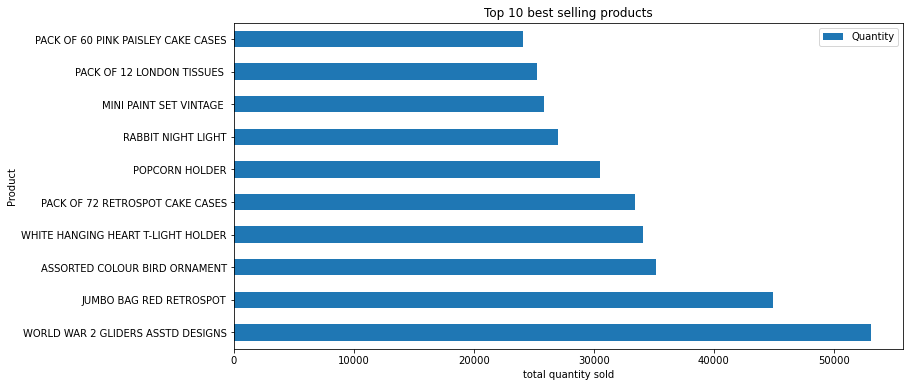

In [15]:
#Aggregate sales by product
top_products = data.groupby('Description').agg({'Quantity': 'sum'}).sort_values(by='Quantity', ascending=False)

#Plot top selling products
top_products.head(10).plot(kind='barh', figsize = (12,6))
plt.title('Top 10 best selling products')
plt.xlabel('total quantity sold')
plt.ylabel('Product')
plt.show()



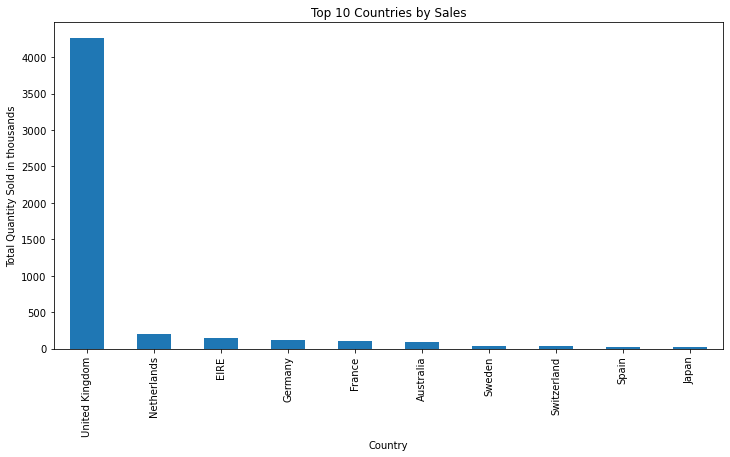

In [12]:
#Aggregate sales by country
country_sales = data.groupby('Country')['Quantity'].sum().sort_values(ascending=False)/1000

#Plot sales by country
country_sales.head(10).plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 Countries by Sales')
plt.ylabel('Total Quantity Sold in thousands')
plt.xlabel('Country')
plt.show()

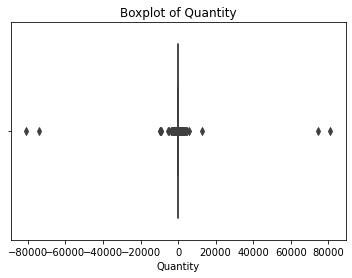

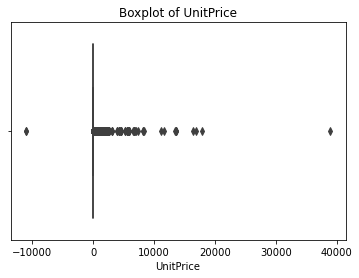

In [17]:
#check for outliers in Quantity and Unitprice
sns.boxplot(x=data['Quantity'])
plt.title('Boxplot of Quantity')
plt.show()

sns.boxplot(x=data['UnitPrice'])
plt.title('Boxplot of UnitPrice')
plt.show()

In [2]:
#Data overview - The dataset contains detailed transactional data, including product descriptions, quantities, unit prices, and customer information. It appears to be well-structured, but there are missing values in some columns, notably in the CustomerID field. After cleaning, the data is ready for analysis, focusing on understanding sales patterns and customer behavior.

#Sales trend over time - The busiest sales months are typically during the holiday season, particularly from september to November, likely due to increased shopping during this period. There’s a noticeable peak in sales during these months, indicating that the store experiences significant seasonal demand. This insight can help the store prepare for inventory management and marketing strategies during peak times.

#Top selling products - The top 10 best-selling products are in high demand, indicating that these items are crucial to the store's revenue. which are world war 2 gliders asstd designs and jumbo bag red retrospot. Understanding what makes these products popular could help in promoting similar items or optimizing inventory for these high-demand products.

#sales by country - The majority of sales are concentrated in a few countries, with the UK being the most dominant market. This suggests that marketing efforts and logistics planning should prioritize these key regions. However, there are also opportunities to expand into other countries with emerging sales figures.

#Outliers and Anomalies - There are significant outliers in both Quantity and UnitPrice, with some transactions having unusually high values. These anomalies could be due to bulk purchases or pricing errors. It’s essential to investigate these outliers further to determine if they represent genuine sales or data entry issues. Removing or adjusting these outliers can help in generating more accurate analyses and forecasts.

#Overall findings - The analysis provides valuable insights into customer purchasing behavior, seasonal trends, and key products driving sales. These findings can guide business decisions such as optimizing inventory, tailoring marketing campaigns to peak seasons, and focusing on high-demand products and key markets. Additionally, understanding and addressing outliers is crucial for maintaining data integrity and accuracy in future analyses.